In [195]:
import numpy                  as np
import pandas                 as pd
import scipy                  as sp
import sklearn.neighbors      as knn
import matplotlib
import matplotlib.pyplot      as plt
import seaborn
import requests
import urllib
import joblib
import requests
import json
import os
import random
import seaborn as sns
#import statsmodels.api as sm
from matplotlib                           import rcParams
from sklearn                              import discriminant_analysis
from sklearn.decomposition                import PCA
from sklearn                              import preprocessing
from sklearn.linear_model                 import LogisticRegression as LogReg
from sklearn.discriminant_analysis        import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis        import QuadraticDiscriminantAnalysis as QDA
from scipy.stats                          import mode
from sklearn                              import linear_model
from IPython.core.interactiveshell        import InteractiveShell
from time                                 import sleep
from collections                          import Counter
from itertools                            import combinations, permutations

%matplotlib inline

In [196]:
#importing dataset and clean missing values and duplicates

import pandas as pd
df = pd.read_csv('MovieGenre.csv', encoding="ISO-8859-1", usecols=["imdbId", "Title", "Genre", "Poster"])
df.set_index(["imdbId"], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(subset="Poster", keep=False, inplace=True)
df  

,Title,Genre,Poster
imdbId,,,
114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...
...,...,...,...
83291,Los violadores (1981),Action|Thriller,https://images-na.ssl-images-amazon.com/images...
83168,Tanya's Island (1980),Drama,https://images-na.ssl-images-amazon.com/images...
82875,Pacific Banana (1981),Comedy,https://images-na.ssl-images-amazon.com/images...


In [197]:
# extract movie's year information as a separate column 

import re

re_year = re.compile("\((\d{4})\)")
df["year"] = df.Title.map(lambda x: int(re_year.findall(x)[0]) if re_year.findall(x) else None)
df

,Title,Genre,Poster,year
imdbId,,,,
114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,1995.0
113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,1995.0
113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0
114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0
113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0
...,...,...,...,...
83291,Los violadores (1981),Action|Thriller,https://images-na.ssl-images-amazon.com/images...,1981.0
83168,Tanya's Island (1980),Drama,https://images-na.ssl-images-amazon.com/images...,1980.0
82875,Pacific Banana (1981),Comedy,https://images-na.ssl-images-amazon.com/images...,1981.0


In [198]:
#separate genre types to multiple columns
df.columns
df[['maingenre','genre2','genre3']] = df.Genre.str.split("|",expand=True,)
df 

,Title,Genre,Poster,year,maingenre,genre2,genre3
imdbId,,,,,,,
114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,1995.0,Animation,Adventure,Comedy
113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,1995.0,Action,Adventure,Family
113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Romance,None
114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Drama,Romance
113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Family,Romance
...,...,...,...,...,...,...,...
83291,Los violadores (1981),Action|Thriller,https://images-na.ssl-images-amazon.com/images...,1981.0,Action,Thriller,None
83168,Tanya's Island (1980),Drama,https://images-na.ssl-images-amazon.com/images...,1980.0,Drama,None,None
82875,Pacific Banana (1981),Comedy,https://images-na.ssl-images-amazon.com/images...,1981.0,Comedy,None,None


In [199]:
df.count

<bound method DataFrame.count of                                      Title                       Genre  \
imdbId                                                                   
114709                    Toy Story (1995)  Animation|Adventure|Comedy   
113497                      Jumanji (1995)     Action|Adventure|Family   
113228             Grumpier Old Men (1995)              Comedy|Romance   
114885            Waiting to Exhale (1995)        Comedy|Drama|Romance   
113041  Father of the Bride Part II (1995)       Comedy|Family|Romance   
...                                    ...                         ...   
83291                Los violadores (1981)             Action|Thriller   
83168                Tanya's Island (1980)                       Drama   
82875                Pacific Banana (1981)                      Comedy   
815258  Werewolf in a Womens Prison (2006)                      Horror   
79142               Xiao zi ming da (1979)               Action|Comedy   

    

In [200]:
#count values for each genre
genre_df=df['maingenre'].value_counts()
genre_df

Drama          9457
Comedy         9327
Action         4556
Documentary    3379
Crime          2434
Horror         1903
Adventure      1617
Animation      1565
Biography      1155
Thriller        390
Short           358
Western         304
Fantasy         269
Mystery         251
Family          241
Romance         197
Sci-Fi          187
Musical         113
War              63
Music            36
History          20
Film-Noir        16
Adult             7
Talk-Show         3
Sport             2
Name: maingenre, dtype: int64

In [201]:
#put genre value counts in dataframe
genre_count = pd.DataFrame(genre_df).reset_index()
genre_count

,index,maingenre
0,Drama,9457
1,Comedy,9327
2,Action,4556
3,Documentary,3379
4,Crime,2434
5,Horror,1903
6,Adventure,1617
7,Animation,1565
8,Biography,1155
9,Thriller,390


In [202]:
#rename genre and counts for plotting
genre_count.columns = ['genre','count']
genre_count

,genre,count
0,Drama,9457
1,Comedy,9327
2,Action,4556
3,Documentary,3379
4,Crime,2434
5,Horror,1903
6,Adventure,1617
7,Animation,1565
8,Biography,1155
9,Thriller,390


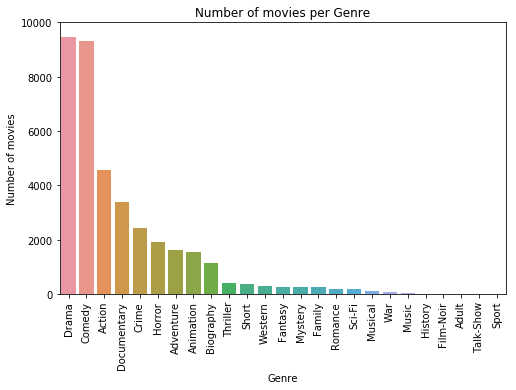

In [203]:
#plotting 
genre_count.sort_values(by="count", ascending=False, inplace=True)

plt.subplots(figsize=(8,5));
sns.barplot(x="genre", y="count", data=genre_count);
plt.xticks(rotation="vertical");
plt.xlabel("Genre");
plt.ylabel("Number of movies");
plt.title("Number of movies per Genre");
plt.ylim((0,10000));

In [10]:
# IMAGE PROCESSING

In [11]:
#Imports
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df.shape

(37850, 7)

In [13]:
df.columns

Index(['Title', 'Genre', 'Poster', 'year', 'maingenre', 'genre2', 'genre3'], dtype='object')

In [14]:
df2 = df.reset_index()
df2

,imdbId,Title,Genre,Poster,year,maingenre,genre2,genre3
0,114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,1995.0,Animation,Adventure,Comedy
1,113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,1995.0,Action,Adventure,Family
2,113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Romance,None
3,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Drama,Romance
4,113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Family,Romance
...,...,...,...,...,...,...,...,...
37845,83291,Los violadores (1981),Action|Thriller,https://images-na.ssl-images-amazon.com/images...,1981.0,Action,Thriller,None
37846,83168,Tanya's Island (1980),Drama,https://images-na.ssl-images-amazon.com/images...,1980.0,Drama,None,None
37847,82875,Pacific Banana (1981),Comedy,https://images-na.ssl-images-amazon.com/images...,1981.0,Comedy,None,None
37848,815258,Werewolf in a Womens Prison (2006),Horror,https://images-na.ssl-images-amazon.com/images...,2006.0,Horror,None,None


In [15]:
df2.shape

(37850, 8)

In [16]:
df2.columns

Index(['imdbId', 'Title', 'Genre', 'Poster', 'year', 'maingenre', 'genre2',
       'genre3'],
      dtype='object')

In [17]:
df2['imdbId'] = df2['imdbId'].astype(str)

In [18]:
df2.info

<bound method DataFrame.info of        imdbId                               Title                       Genre  \
0      114709                    Toy Story (1995)  Animation|Adventure|Comedy   
1      113497                      Jumanji (1995)     Action|Adventure|Family   
2      113228             Grumpier Old Men (1995)              Comedy|Romance   
3      114885            Waiting to Exhale (1995)        Comedy|Drama|Romance   
4      113041  Father of the Bride Part II (1995)       Comedy|Family|Romance   
...       ...                                 ...                         ...   
37845   83291               Los violadores (1981)             Action|Thriller   
37846   83168               Tanya's Island (1980)                       Drama   
37847   82875               Pacific Banana (1981)                      Comedy   
37848  815258  Werewolf in a Womens Prison (2006)                      Horror   
37849   79142              Xiao zi ming da (1979)               Action|Comedy

In [19]:
#IMAGE PROCESSING CODE STARTS HERE

import os
from sklearn.model_selection import train_test_split

import urllib.request
from urllib.error import HTTPError

from PIL import Image

In [20]:
na_rows = df2[df2.Genre.str.contains('N/A') == True].index
df2 = df2.drop(na_rows, axis=0)

In [27]:

# Select the top 4000 rows of the Dataframe for 2 columns only
dftest = df2.head(5000)
dftest

,imdbId,Title,Genre,Poster,year,maingenre,genre2,genre3
0,114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,1995.0,Animation,Adventure,Comedy
1,113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,1995.0,Action,Adventure,Family
2,113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Romance,None
3,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Drama,Romance
4,113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Family,Romance
...,...,...,...,...,...,...,...,...
4995,55539,Town Without Pity (1961),Crime|Drama,https://images-na.ssl-images-amazon.com/images...,1961.0,Crime,Drama,None
4996,81698,Used Cars (1980),Comedy,https://images-na.ssl-images-amazon.com/images...,1980.0,Comedy,None,None
4997,50294,The Deadly Mantis (1957),Horror|Sci-Fi|Thriller,https://images-na.ssl-images-amazon.com/images...,1957.0,Horror,Sci-Fi,Thriller
4998,259288,Dragonfly (2002),Drama|Fantasy|Mystery,https://images-na.ssl-images-amazon.com/images...,2002.0,Drama,Fantasy,Mystery


In [28]:
# Transform images to arrays 
from tqdm import tqdm

img_width = 350
img_height = 350

X = []

for i in tqdm(range(dftest.shape[0])):
      path = 'posters/' + dftest['imdbId'][i] + '.jpg'
      img = image.load_img(path, target_size=(img_width, img_height, 3))
      img = image.img_to_array(img)
      img = img/255.0
      X.append(img)

X = np.array(X)




  0%|          | 0/5000 [00:00<?, ?it/s]


  1%|          | 32/5000 [00:00<00:15, 314.91it/s]


  1%|▏         | 68/5000 [00:00<00:15, 326.05it/s]


  2%|▏         | 101/5000 [00:00<00:14, 326.78it/s]


  3%|▎         | 138/5000 [00:00<00:14, 337.81it/s]


  4%|▎         | 175/5000 [00:00<00:13, 345.66it/s]


  4%|▍         | 212/5000 [00:00<00:13, 349.51it/s]


  5%|▍         | 247/5000 [00:00<00:13, 349.02it/s]


  6%|▌         | 280/5000 [00:00<00:13, 341.15it/s]


  6%|▋         | 315/5000 [00:00<00:13, 341.45it/s]


  7%|▋         | 353/5000 [00:01<00:13, 349.84it/s]


  8%|▊         | 388/5000 [00:01<00:13, 347.22it/s]


  8%|▊         | 423/5000 [00:01<00:13, 329.30it/s]


  9%|▉         | 456/5000 [00:01<00:13, 328.29it/s]


 10%|▉         | 489/5000 [00:01<00:14, 313.48it/s]


 10%|█         | 521/5000 [00:01<00:14, 302.50it/s]


 11%|█         | 552/5000 [00:01<00:15, 293.21it/s]


 12%|█▏        | 582/5000 [00:01<00:15, 294.40it/s]


 12%|█▏        | 612/5000 [00:01<00:14

In [29]:
X.shape

(5000, 350, 350, 3)

GENRE Biography|Drama|Fantasy


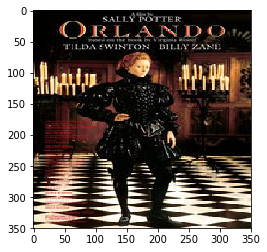

In [31]:
plt.imshow(X[500])
print('GENRE',dftest['Genre'][500])

In [32]:

def string_to_vector(data, val_name):
    
    from sklearn.feature_extraction.text import CountVectorizer
    
    # convert any np.nan to a string 'nan'
    data[val_name][pd.isnull(data[val_name])] = 'nan'
    
    vectorizer = CountVectorizer(analyzer = "word",   
                                             tokenizer = None,    
                                             preprocessor = None, 
                                             stop_words = None,   
                                             max_features = 50000)

    val_data = vectorizer.fit_transform(data[val_name])
    df_val = pd.DataFrame(val_data.toarray())
    df_val.columns = vectorizer.get_feature_names()
    df_val.index = data.index
    
    return df_val

In [33]:
import pandas as pd
df_genres = string_to_vector(dftest, "Genre")
df_genres.head(5000)

/Users/krystal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/krystal/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/krystal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,...,musical,mystery,noir,romance,sci,short,sport,thriller,war,western
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4998,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0


In [34]:
df_new = pd.concat([dftest,df_genres], axis=1)
df_new.head()

,imdbId,Title,Genre,Poster,year,maingenre,genre2,genre3,action,adventure,...,musical,mystery,noir,romance,sci,short,sport,thriller,war,western
0,114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,1995.0,Animation,Adventure,Comedy,0,1,...,0,0,0,0,0,0,0,0,0,0
1,113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,1995.0,Action,Adventure,Family,1,1,...,0,0,0,0,0,0,0,0,0,0
2,113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Romance,None,0,0,...,0,0,0,1,0,0,0,0,0,0
3,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Drama,Romance,0,0,...,0,0,0,1,0,0,0,0,0,0
4,113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Family,Romance,0,0,...,0,0,0,1,0,0,0,0,0,0


In [42]:
df_new2 = df_new.drop(['imdbId','Title', 'Poster','year','maingenre','genre2','genre3'], axis = 1)
df_new2

,Genre,action,adventure,animation,biography,comedy,crime,documentary,drama,family,...,musical,mystery,noir,romance,sci,short,sport,thriller,war,western
0,Animation|Adventure|Comedy,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Action|Adventure|Family,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Comedy|Romance,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Comedy|Drama|Romance,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,Comedy|Family|Romance,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Crime|Drama,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4996,Comedy,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,Horror|Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4998,Drama|Fantasy|Mystery,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [43]:
y = df_new2.drop(['Genre'],axis=1)
y

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,...,musical,mystery,noir,romance,sci,short,sport,thriller,war,western
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4998,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0


In [44]:
y = y.to_numpy()
y.shape

(5000, 25)

In [46]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [47]:
# image shape
X_train[0].shape

(350, 350, 3)

In [48]:
# genre shape
y_train[0].shape

(25,)

In [173]:
y

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [50]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

Using TensorFlow backend.


In [51]:
#full model
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape =(350,350,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25, activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 174, 174, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 86, 86, 32)       

In [53]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [54]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 1994s 498ms/step - loss: 0.8001 - accuracy: 0.5734 - val_loss: 3.5451 - val_accuracy: 0.4216
Epoch 2/5
4000/4000 [==============================] - 2737s 684ms/step - loss: 0.4537 - accuracy: 0.8142 - val_loss: 0.3452 - val_accuracy: 0.8932
Epoch 3/5
4000/4000 [==============================] - 2799s 700ms/step - loss: 0.3032 - accuracy: 0.8930 - val_loss: 0.2684 - val_accuracy: 0.9021
Epoch 4/5
4000/4000 [==============================] - 2335s 584ms/step - loss: 0.2793 - accuracy: 0.9019 - val_loss: 0.2536 - val_accuracy: 0.9059
Epoch 5/5
4000/4000 [==============================] - 2587s 647ms/step - loss: 0.2714 - accuracy: 0.9044 - val_loss: 0.2522 - val_accuracy: 0.9058


In [56]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'TEST'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'TEST'], loc='upper left')
  plt.show()

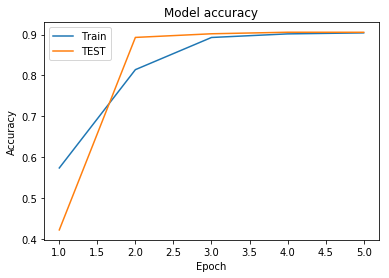

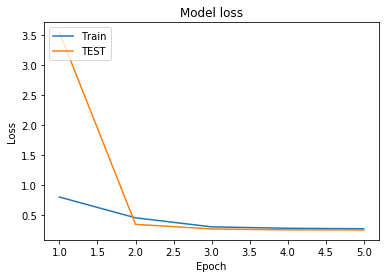

In [58]:
plot_learningCurve(history, 5)

['action' 'adventure' 'animation' 'biography' 'comedy' 'crime'
 'documentary' 'drama' 'family' 'fantasy' 'fi' 'film' 'history' 'horror'
 'music' 'musical' 'mystery' 'noir' 'romance' 'sci' 'short' 'sport'
 'thriller' 'war' 'western']
drama (0.646)
comedy (0.265)
romance (0.226)


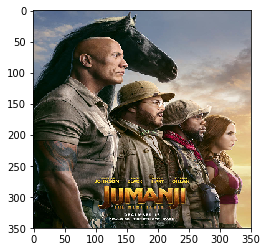

In [209]:
img = image.load_img('predict/test1.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = np.array(df_new2.columns[1:])
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
 print('{}'.format(classes[top3[i]])+' ({:.3})'.format(y_prob[0][top3[i]]))

In [88]:
import os

os.system('jupyter nbconvert --to html poster.ipynb')

65280